In [ ]:
import numpy as np
import importlib
from gal_goku import plot
importlib.reload(plot)
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/'
train_subdir = 'HMF/train_poisson/'
num_inducing = 500
num_latents = 14
epochs = 12_000


sims = np.arange(36)


composite_kernel = ['matern32', 'matern52', 'matern32', 'matern52']
norm_type = 'subtract_mean'  # Options could be 'subtract_mean' or 'std_gaussian'

plot_hmf_emu = plot.HmfCombined(sims=sims, data_dir=data_dir, train_subdir=train_subdir, num_inducing=num_inducing, num_latents=num_latents, epochs=epochs, composite_kernel=composite_kernel, norm_type=norm_type, logging_level='INFO')



_ = plot_hmf_emu.pred_vs_trtuh()

In [2]:
import numpy as np
import importlib
from gal_goku import plot, summary_stats
importlib.reload(plot)
data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/'

hmf = summary_stats.HMF(data_dir=data_dir, fid='L2', z=2.5, narrow=False, logging_level='DEBUG')

In [9]:
full_bins, log_hmf, mult_fac, _, _ = hmf.get_data(get_counts=True)
mbins = 0.5 * (full_bins[1:] + full_bins[:-1])

summary_stats | 10/17/2025 02:23:18 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5
summary_stats | 10/17/2025 02:23:18 PM | Rank 0 | INFO  |  loading from L2_hmfs_2.5_no_merge.hdf5


In [10]:
mult_fac.shape, full_bins.shape, log_hmf.shape

((557, 14), (15,), (557, 14))

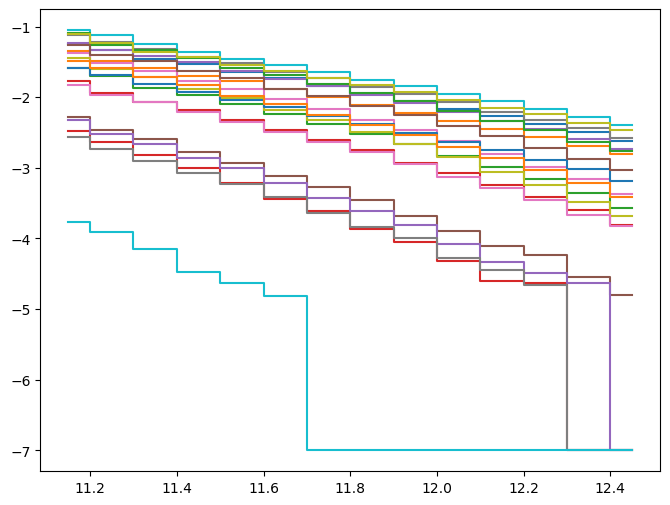

In [39]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

ind = np.random.randint(0, log_hmf.shape[0], size=20)
for i in ind:
    ax.plot(mbins, log_hmf[i], drawstyle='steps-mid')